In [1]:
import numpy as np
#importing the neural network model
from neuralnet import neuralNetwork, sigmoid

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#parameters and hyperparameters 
input_nodes = 784
hidden_nodes = 200
output_nodes = 10
learning_rate = 0.1

In [4]:
#create a neural network instance
nn_model = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [8]:
# load the mnist training data CSV file into a list
training_data_file = open("dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

The target value is:  5


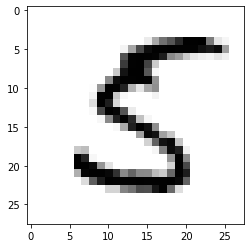

In [11]:
#showing a random value from the dataset
import random
cache = random.randint(0,60000)
all_values = training_data_list[cache].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation=None)
print("The target value is: " , all_values[0])

In [12]:
# train the neural network
# epochs is the number of times the training data set is used for training
epochs = 10
for e in range(epochs):
    print("Epoch: " + str(e+1) + "/" + str(epochs))
    # go through all records in the training data set 
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record 
        targets[int(all_values[0])] = 0.99
        nn_model.train(inputs, targets)
        pass
    pass

Epoch: 1/10
Epoch: 2/10
Epoch: 3/10
Epoch: 4/10
Epoch: 5/10
Epoch: 6/10
Epoch: 7/10
Epoch: 8/10
Epoch: 9/10
Epoch: 10/10


In [14]:
# load the mnist test data CSV file into a list 
test_data_file = open("dataset/mnist_test.csv", 'r') 
test_data_list = test_data_file.readlines() 
test_data_file.close()

In [15]:
# test the neural network
# scorecard for how well the network performs, initially empty 
scorecard = []
# go through all the records in the test data set 
for record in test_data_list:
    # split the record by the ',' commas 
    all_values = record.split(',')
    # correct answer is first value 
    correct_label = int(all_values[0]) 
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01 
    # query the network
    outputs = nn_model.predict(inputs)
    # the index of the highest value corresponds to the label 
    label = np.argmax(outputs)
    # append correct or incorrect to list 
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1) 
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0) 
        pass
    pass

In [16]:
# calculate the performance score, the fraction of correct answers 
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9729


By:
Prabesh Paudel
August, 2019